## __Dropout and Success: Student Data Analysis__

Exploring the Impact of Dropout Rates on Student Success.

https://www.kaggle.com/datasets/marouandaghmoumi/dropout-and-success-student-data-analysis

### __Dataset Description__

This dataset was created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies. The dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. The data is used to build classification models to predict students' dropout and academic sucess. The problem is formulated as a three category classification task, in which there is a strong imbalance towards one of the classes.

The dataset includes information known at the time of student enrollment – academic path, demographics, and social-economic factors:

- Marital status: Categorical variable indicating the marital status of the individual.
- Application mode: Categorical variable indicating the mode of application.
- Application order: Numeric variable indicating the order of application.
- Course: Categorical variable indicating the chosen course.
- evening attendance: Binary variable indicating whether the individual attends classes during the daytime or evening.
- Previous qualification: Numeric variable indicating the level of the previous qualification.
- Nationality: Categorical variable indicating the nationality of the individual.
- Mother's qualification: Numeric variable indicating the level of the mother's qualification.
- Father's qualification: Numeric variable indicating the level of the father's qualification.
- Mother's occupation: Categorical variable indicating the mother's occupation.
- Father's occupation: Categorical variable indicating the father's occupation.
- Displaced: Binary variable indicating whether the individual has been displaced (1 – yes 0 – no).
- Educational special needs: Binary variable indicating whether the individual has educational special needs (1 for yes, 0 for no).
- Debtor: Binary variable indicating whether the individual is a debtor (1 for yes, 0 for no).
- Tuition fees up to date: Binary variable indicating whether the tuition fees are up to date (1 for yes, 0 for no).
- Gender: Binary variable indicating the gender of the individual (1 for male, 0 for female).
- Scholarship holder: Binary variable indicating whether the individual holds a scholarship (1 for yes, 0 for no).
- Age at enrollment: Numeric variable indicating the age of the individual at the time of enrollment.
- International: Binary variable indicating whether the individual is international (1 for yes, 0 for no).
- Curricular units 1st sem (credited): Numeric variable indicating the number of credited curricular units in the 1st semester.
- Curricular units 1st sem (enrolled): Numeric variable indicating the number of enrolled curricular units in the 1st semester.
- Curricular units 1st sem (evaluations): Numeric variable indicating the number of evaluations for curricular units in the 1st semester.
- Curricular units 1st sem (approved): Numeric variable indicating the number of approved curricular units in the 1st semester.
- Curricular units 1st sem (grade): Numeric variable indicating the average grade for curricular units in the 1st semester.
- Curricular units 1st sem (without evaluations): Numeric variable indicating the number of curricular units in the 1st semester without evaluations.
- Curricular units 2nd sem (credited): Numeric variable indicating the number of credited curricular units in the 2nd semester.
- Curricular units 2nd sem (enrolled): Numeric variable indicating the number of enrolled curricular units in the 2nd semester.
- Curricular units 2nd sem (evaluations): Numeric variable indicating the number of evaluations for curricular units in the 2nd semester.
- Curricular units 2nd sem (approved): Numeric variable indicating the number of approved curricular units in the 2nd semester.
- Curricular units 2nd sem (grade): Numeric variable indicating the average grade for curricular units in the 2nd semester.
- Curricular units 2nd sem (without evaluations): Numeric variable indicating the number of curricular units in the 2nd semester without evaluations.
- Unemployment rate: variable indicating the unemployment rate(Unemployment rate (%)).
- Inflation rate: Numeric variable indicating the inflation rate(Inflation rate (%)).
- GDP: Numeric variable indicating the Gross Domestic Product.
- output: Categorical variable indicating the target variable (e.g., Dropout, Graduate, Enrolled).

#### __Fetching data from Kaggle__

In [44]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/kaggle"
os.makedirs("/content/kaggle", exist_ok=True)
!mv kaggle.json /content/kaggle/
!chmod 600 /content/kaggle/kaggle.json
!kaggle datasets download -d saurabhbagchi/books-dataset
!unzip books-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/saurabhbagchi/books-dataset
License(s): CC0-1.0
books-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  books-dataset.zip
replace books_data/books.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

#### __Import the necessary libraries__

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

#### __Loading the dataset__

In [46]:
books_data = pd.read_csv("books_data/books.csv", encoding='iso-8859-1', sep=';', on_bad_lines='skip')
books_data.head()

/tmp/ipython-input-2363359368.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books_data = pd.read_csv("books_data/books.csv", encoding='iso-8859-1', sep=';', on_bad_lines='skip')


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [48]:
ratings_data = pd.read_csv("books_data/ratings.csv", encoding='iso-8859-1', sep=';', on_bad_lines='skip')
ratings_data.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [64]:
users_data = pd.read_csv("books_data/users.csv", delimiter=';', encoding='iso-8859-1', on_bad_lines='skip')
users_data.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [50]:
print(books_data.shape)
print(ratings_data.shape)
print(users_data.shape)

(271360, 8)
(1149780, 3)
(278858, 3)


#### __Inspecting/Cleaning the data__

In [51]:
books_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [52]:
ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [53]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [54]:
books_data.isna().sum()

,0
ISBN,0
Book-Title,0
Book-Author,2
Year-Of-Publication,0
Publisher,2
Image-URL-S,0
Image-URL-M,0
Image-URL-L,3


In [55]:
ratings_data.isna().sum()

,0
User-ID,0
ISBN,0
Book-Rating,0


In [56]:
users_data.isna().sum()

,0
User-ID,0
Location,0
Age,110762


In [57]:
books_data.duplicated().sum()

np.int64(0)

In [58]:
ratings_data.duplicated().sum()

np.int64(0)

In [59]:
users_data.duplicated().sum()

np.int64(0)

In [60]:
books_data.dropna(inplace=True)

In [65]:
# users_data.drop('Age', axis=1, inplace=True)
users_data.drop(columns=['Age'], inplace=True)

### __Popularity Based Recommendation System__

In [66]:
ratings_result = ratings_data.merge(books_data, on='ISBN')
ratings_result.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...


##### __Observation:__

- Here, we are merging the `ratings_data` df and `books_data` df to get the ratings information for a particular `Book-Title`.
- We will find the number of ratings and average ratings per `Book-Title`.
- Then, filter the books with ratings more than 300.

In [67]:
ratings_result.shape

(1031128, 10)

In [80]:
books_with_rating_df = ratings_result.groupby('Book-Title').count()['Book-Rating'].reset_index()
books_with_rating_df.rename(columns={"Book-Rating": "num_ratings"}, inplace=True)
books_with_rating_df.head()

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


In [86]:
books_with_mean_rating_df = ratings_result.groupby('Book-Title').mean(numeric_only=True)['Book-Rating'].reset_index()
books_with_mean_rating_df.rename(columns={"Book-Rating": "avg_rating"}, inplace=True)
books_with_mean_rating_df

,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241060,Ã?Â?lpiraten.,0.000000
241061,Ã?Â?rger mit Produkt X. Roman.,5.250000
241062,Ã?Â?sterlich leben.,7.000000
241063,Ã?Â?stlich der Berge.,2.666667


In [87]:
popular_df = pd.merge(books_with_rating_df, books_with_mean_rating_df, on="Book-Title")
popular_df.head()

,Book-Title,num_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.25
1,Always Have Popsicles,1,0.00
2,Apple Magic (The Collector's series),1,0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.00
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.00


In [89]:
popular_df = popular_df[popular_df['num_ratings'] >= 300].sort_values('avg_rating', ascending=False)
popular_df

,Book-Title,num_ratings,avg_rating
80431,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80419,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80423,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80411,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
187372,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370
...,...,...,...
233507,While I Was Gone,431,2.580046
201920,The Perfect Storm : A True Story of Men Agains...,404,2.539604
4808,A Map of the World,327,2.492355
52406,Disclosure,318,2.345912


In [98]:
popular_books_df = popular_df.merge(books_data, on="Book-Title").drop_duplicates("Book-Title")[['Book-Title', 'Book-Author', 'num_ratings', 'avg_rating']]
popular_books_df.head(10)

,Book-Title,Book-Author,num_ratings,avg_rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,387,5.824289
5,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,347,5.501441
9,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,556,5.183453
12,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,368,4.948370
21,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,575,4.895652
23,To Kill a Mockingbird,Harper Lee,510,4.700000
31,The Da Vinci Code,Dan Brown,898,4.642539
37,The Five People You Meet in Heaven,Mitch Albom,430,4.551163
39,The Catcher in the Rye,J.D. Salinger,449,4.545657


#### __Connvert categorical variable to numerical__

In [ ]:
# Define the output classes
output_classes = ['Dropout', 'Enrolled', 'Graduate']

# Initialize the OrdinalEncoder and specify the order of categories
encoder = OrdinalEncoder(categories=[output_classes])

# Fit and transform the 'Output' column
# Reshape the column to a 2D array as required by fit_transform
student_data['Output'] = encoder.fit_transform(student_data[['Output']])

In [ ]:
student_data['Output'].tail()

,Output
4419,2.0
4420,0.0
4421,0.0
4422,2.0
4423,2.0


#### __Perform train-test split__

In [ ]:
# Separate features and target variable
# Assuming 'Output' is the target variable in your dataset

X = student_data.drop('Output', axis=1)
y = student_data['Output']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

### __Random Forest Classifier - Student Analysis Dataset__

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Train Random Forest
pipeline_rfc = Pipeline([
    ('scaler', StandardScaler()),     # Standardize the data
    ('clf', RandomForestClassifier(n_estimators=70,random_state=42)) # Random Forest classifier
])

pipeline_rfc.fit(X_train, y_train)

# Predict on testing set
y_pred_test_rfc = pipeline_rfc.predict(X_test)
y_pred_test_prob_rfc = pipeline_rfc.predict_proba(X_test)

# Determine the class order
class_order_rfc = pipeline_rfc.classes_
print("Class order (RFC):", class_order_rfc)

Class order (RFC): [0. 1. 2.]


In [ ]:
feature_importance = sorted(pipeline_rfc.named_steps['clf'].feature_importances_)

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df.head()

,Feature,Importance
33,GDP,0.135086
32,Inflation rate,0.099361
31,Unemployment rate,0.090961
30,Curricular units 2nd sem (without evaluations),0.084201
29,Curricular units 2nd sem (grade),0.047089


#### __Visualising the Important features (using RF classifier)__

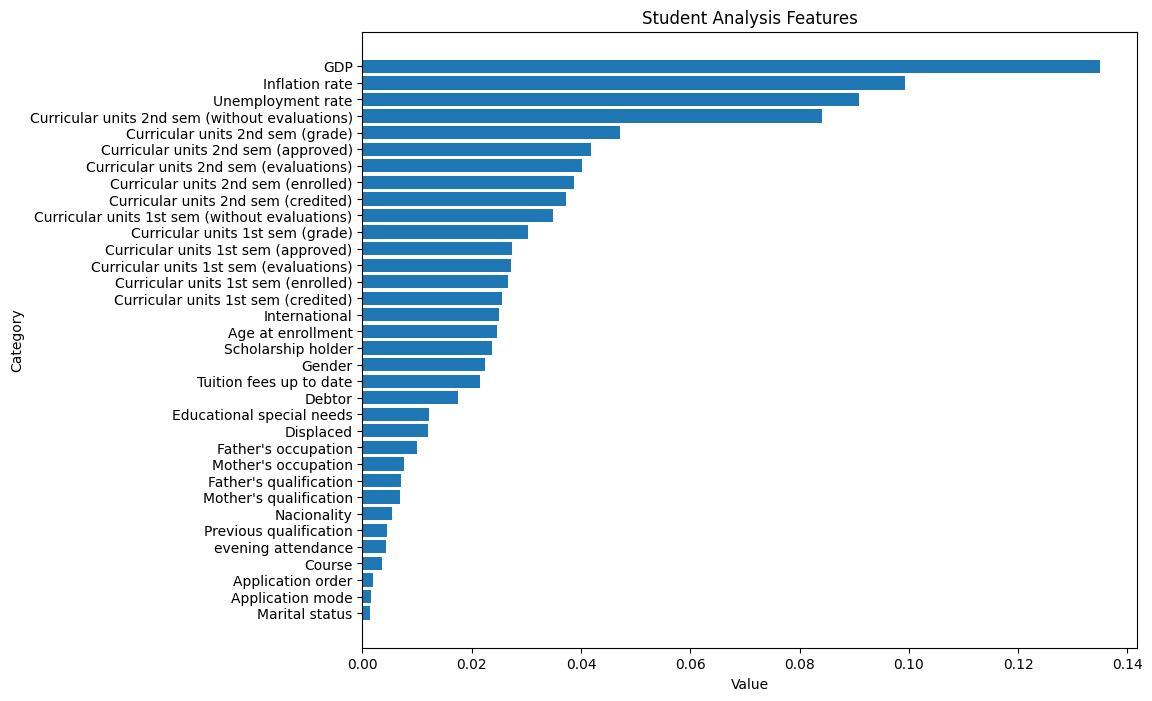

In [ ]:
plt.figure(figsize=(10,8))
plt.barh(X.columns, feature_importance)
plt.xlabel('Value')
plt.ylabel('Category')
plt.title('Student Analysis Features')
plt.show()

In [ ]:
# Create a DataFrame to display actual and predicted labels with probabilities
results_df = pd.DataFrame({
    'Actual Label': y_test,
    'Predicted Label': y_pred_test_rfc,
})

# Add predicted probabilities with correct class names
for i, class_name in enumerate(class_order_rfc):
    results_df[f'Predicted Probability {class_name}'] = np.round(y_pred_test_prob_rfc[:, i], 2)

# Display the first few rows of the results DataFrame
results_df.head()

,Actual Label,Predicted Label,Predicted Probability 0.0,Predicted Probability 1.0,Predicted Probability 2.0
2700,0.0,0.0,0.50,0.16,0.34
1141,1.0,2.0,0.19,0.31,0.50
3537,0.0,0.0,0.97,0.03,0.00
2999,0.0,0.0,0.97,0.03,0.00
475,2.0,2.0,0.16,0.17,0.67


In [ ]:
# Calculate training and testing accuracy
training_accuracy_rfc =  accuracy_score(y_train, pipeline_rfc.predict(X_train))
testing_accuracy_rfc = accuracy_score(y_test, y_pred_test_rfc)

print(f"Training Accuracy: {training_accuracy_rfc}")
print(f"Testing Accuracy: {testing_accuracy_rfc}")

Training Accuracy: 1.0
Testing Accuracy: 0.7846385542168675


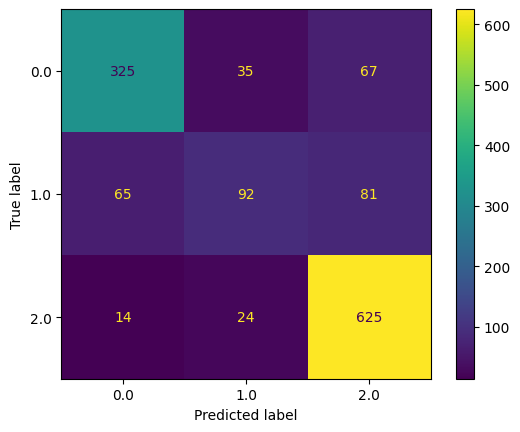

In [ ]:
# Generate the confusion matrix
conf_matrix_rfc = confusion_matrix(y_test, y_pred_test_rfc, labels=class_order_rfc)

# Heatmap visualization for confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rfc, display_labels=class_order_rfc)

# display matrix
cm_display.plot()
plt.show()

#### __Using cross_val_score with the pipeline and training data__

In [ ]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)
k_fold_scores = cross_val_score(pipeline_rfc, X_train, y_train, cv=kf)

print(f"Mean CV Score (Random Forest): {np.mean(np.abs(k_fold_scores))}")

Mean CV Score (Random Forest): 0.7674371019939451


#### __Using GridSearchCV with Cross-Validation to find optimal params__

In [ ]:
# Defining the parameters for GridSearchCV
param_grid = {
    'clf__n_estimators': [70, 100, 200, 300],
    'clf__criterion': ['gini', 'entropy'],
    'clf__max_depth': [None, 10, 20, 30, 40],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 4],
    # 'clf__max_features': [None, 'auto', 'sqrt', 'log2'],
    # 'clf__bootstrap': [True, False]
}

# Setting up the Random Forest classifier
pipeline_rfc = Pipeline([
    ('scaler', StandardScaler()),     # Standardize the data
    ('clf', RandomForestClassifier(random_state=42)) # Random Forest classifier
])

# Applying GridSearchCV for hyperparameter tuning
grid_search_rfc = GridSearchCV(estimator=pipeline_rfc, param_grid=param_grid, cv=5, scoring='accuracy', return_train_score=True, n_jobs=-1)
grid_search_rfc.fit(X_train, y_train)

print("Best parameters found by GridSearchCV:")
print(grid_search_rfc.best_params_)

# Getting the best estimator
best_rfc = grid_search_rfc.best_estimator_

# Predict on the testing set
y_pred_test_rfc = best_rfc.predict(X_test)

print(classification_report(y_test, y_pred_test_rfc, target_names= output_classes))

Best parameters found by GridSearchCV:
{'clf__criterion': 'entropy', 'clf__max_depth': 20, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 10, 'clf__n_estimators': 300}
              precision    recall  f1-score   support

     Dropout       0.80      0.76      0.78       427
    Enrolled       0.60      0.32      0.41       238
    Graduate       0.79      0.95      0.87       663

    accuracy                           0.78      1328
   macro avg       0.73      0.68      0.69      1328
weighted avg       0.76      0.78      0.76      1328



### __KNN Classifier - Student Analysis Dataset__

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),                # Standardize the data
    ('knn', KNeighborsClassifier(n_neighbors=3)) # KNN classifier
])

# knn_model = KNeighborsClassifier(n_neighbors=3)
pipeline_knn.fit(X_train, y_train)

# Predict on testing set
y_pred_test_knn = pipeline_knn.predict(X_test)
y_pred_test_prob_knn = pipeline_knn.predict_proba(X_test)

# Determine the class order
class_order_knn = pipeline_knn.classes_
print("Class order (KNN):", class_order_knn)

Class order (KNN): [0. 1. 2.]


In [ ]:
# Create a DataFrame to display actual and predicted labels with probabilities
results_df = pd.DataFrame({
    'Actual Label': y_test,
    'Predicted Label': y_pred_test_knn,
})

# Add predicted probabilities with correct class names
for i, class_name in enumerate(class_order_knn):
    results_df[f'Predicted Probability {class_name}'] = np.round(y_pred_test_prob_knn[:, i], 2)

# Display the first few rows of the results DataFrame
results_df.head()

,Actual Label,Predicted Label,Predicted Probability 0.0,Predicted Probability 1.0,Predicted Probability 2.0
2700,0.0,0.0,1.00,0.0,0.00
1141,1.0,2.0,0.00,0.0,1.00
3537,0.0,0.0,1.00,0.0,0.00
2999,0.0,0.0,1.00,0.0,0.00
475,2.0,2.0,0.33,0.0,0.67


In [ ]:
# Calculate training and testing accuracy
print("K-Nearest Neighbors Classification:")
training_accuracy_knn =  accuracy_score(y_train, pipeline_knn.predict(X_train))
testing_accuracy_knn = accuracy_score(y_test, y_pred_test_knn)

print(f"Training Accuracy: {training_accuracy_knn}")
print(f"Testing Accuracy: {testing_accuracy_knn}")

K-Nearest Neighbors Classification:
Training Accuracy: 0.8142764857881137
Testing Accuracy: 0.6762048192771084


#### __Using cross_val_score with the pipeline and training data__

In [ ]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)
k_fold_scores = cross_val_score(pipeline_knn, X_train, y_train, cv=kf)

print(f"Mean CV Score (KNN): {np.mean(np.abs(k_fold_scores))}")

Mean CV Score (KNN): 0.6782795698924732


#### __SVM Classifier - Student Analysis Dataset__

In [ ]:
from sklearn.svm import SVC

In [ ]:
C = 1.0

# Create a pipeline with a standard scaler and an SVM classifier
pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),                   # Standardize the data
    ('svm', SVC(kernel='linear', C=C, probability=True, random_state=42, decision_function_shape='ovr')) # SVM classifier with probability estimates
])

# Train the pipeline on the training data
pipeline_svm.fit(X_train, y_train)

# Predict on the training and testing set
y_pred_train_svm = pipeline_svm.predict(X_train)
y_pred_test_svm = pipeline_svm.predict(X_test)

# Predict probabilities for the test set
y_pred_test_prob_svm = pipeline_svm.predict_proba(X_test)[:, 1]

results_df_svm = pd.DataFrame({
    'Actual Label': y_test,
    'Predicted Label': y_pred_test_svm,
    'Predicted Probability': y_pred_test_prob_svm
})

results_df_svm.tail()

,Actual Label,Predicted Label,Predicted Probability
3580,2.0,2.0,0.278342
939,0.0,0.0,0.340804
244,2.0,2.0,0.032431
4061,2.0,2.0,0.273344
747,2.0,2.0,0.144001


In [ ]:
# Calculate training and testing accuracy
training_accuracy_svm = accuracy_score(y_train, y_pred_train_svm)
testing_accuracy_svm = accuracy_score(y_test, y_pred_test_svm)

print("Support Vector Machines (SVM):")
print(f"Training Accuracy: {training_accuracy_svm}")
print(f"Testing Accuracy: {testing_accuracy_svm}")

Support Vector Machines (SVM):
Training Accuracy: 0.7761627906976745
Testing Accuracy: 0.7620481927710844


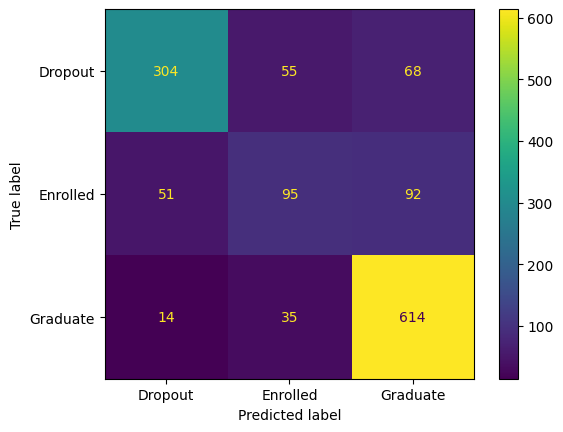

              precision    recall  f1-score   support

     Dropout       0.82      0.71      0.76       427
    Enrolled       0.51      0.40      0.45       238
    Graduate       0.79      0.93      0.85       663

    accuracy                           0.76      1328
   macro avg       0.71      0.68      0.69      1328
weighted avg       0.75      0.76      0.75      1328



In [ ]:
# Print confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_test_svm)

# Heatmap visualization for confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix_svm, display_labels = output_classes)

# display matrix
cm_display.plot()
plt.show()

print(classification_report(y_test, y_pred_test_svm, target_names= output_classes))

#### __Using cross_val_score with the pipeline and training data__

In [ ]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)
k_fold_scores = cross_val_score(pipeline_svm, X_train, y_train, cv=kf)

print(f"Mean CV Score (SVM): {np.mean(np.abs(k_fold_scores))}")

Mean CV Score (SVM): 0.7661269443574485


#### __Using GridSearchCV with Cross-Validation to find optimal params__

In [ ]:
# Defining the parameters for GridSearchCV
param_grid = {
    'svm__C': [0.1, 1, 10],  # Regularization strength
    # 'svm__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel types
    'svm__kernel': ['linear', 'poly', 'rbf'],  # Kernel types
    # 'svm__gamma': ['scale', 'auto'],  # Kernel coefficient
    'svm__degree': [1, 4],  # Degree for poly kernel
}

scores = ['precision', 'recall']

# Create a pipeline with a standard scaler and an SVM classifier
pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),                   # Standardize the data
    ('svm', SVC(kernel='linear', C=C, probability=True, random_state=42, decision_function_shape='ovr')) # SVM classifier with probability estimates
])

# for score in scores:
# Initialize GridSearchCV
grid_search_svm = GridSearchCV(pipeline_svm, param_grid, cv=5, scoring='accuracy')

# Perform Grid Search
grid_search_svm.fit(X_train, y_train)

print("Best parameters found by GridSearchCV:")
print(grid_search_svm.best_params_)

# Getting the best estimator
best_svm = grid_search_svm.best_estimator_

# Predict on the testing set
y_pred_test_svm = best_svm.predict(X_test)

print(classification_report(y_test, y_pred_test_svm, target_names= output_classes))


Best parameters found by GridSearchCV:
{'svm__C': 10, 'svm__degree': 1, 'svm__kernel': 'linear'}
              precision    recall  f1-score   support

     Dropout       0.82      0.71      0.76       427
    Enrolled       0.51      0.40      0.45       238
    Graduate       0.79      0.93      0.85       663

    accuracy                           0.76      1328
   macro avg       0.71      0.68      0.69      1328
weighted avg       0.75      0.76      0.75      1328

